**Importing useful libriaries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

<h3>Import data</h3>

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df.shape

(4238, 16)

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Then, we create a Python list headers containing name of headers.

In [5]:
headers = ["Male","Age","Education","CurrentSmoker","CigsPerDay","BPMeds","Stroke","Hypertensive","Diabetes","TotCholesterol","SystBP","DiastBP","BMI","HeartRate","Glucose","TenYearRiskCHD"]

We replace headers and recheck our dataframe:

In [6]:
df.columns = headers
df.head()

,Male,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,Stroke,Hypertensive,Diabetes,TotCholesterol,SystBP,DiastBP,BMI,HeartRate,Glucose,TenYearRiskCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Features description
https://biolincc.nhlbi.nih.gov/studies/framcohort/
Framingham heart disease

- Male: male or female(Nominal)<br>
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral<br>
- Education: Education level<br>
- CurrentSmoker: whether or not the patient is a current smoker (Nominal)<br>
- CigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)<br>
- BPMeds: whether or not the patient was on blood pressure medication (Nominal)<br>
- Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
- Hypertensive: whether or not the patient was hypertensive (Nominal)<br>
- Diabetes: whether or not the patient had diabetes (Nominal)<br>
- TotCholesterol: total cholesterol level (Continuous)<br> 
- SystBP: systolic blood pressure (Continuous)<br>
- DiastBP: diastolic blood pressure (Continuous)<br>
- BMI: Body Mass Index (Continuous)<br>
- HeartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
- Glucose: glucose level (Continuous)<br> 
Predict variable (desired target)<br>
- TenYearRiskCHD: 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

Seeing distributions of all the features before imputing missing values

In [7]:
#df["TotCholesterol"].mean()
df["BPMeds"].mean()

0.02962962962962963

array([[<AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'CurrentSmoker'}>],
       [<AxesSubplot:title={'center':'CigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Hypertensive'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'TotCholesterol'}>,
        <AxesSubplot:title={'center':'SystBP'}>,
        <AxesSubplot:title={'center':'DiastBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'HeartRate'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'TenYearRiskCHD'}>]], dtype=object)

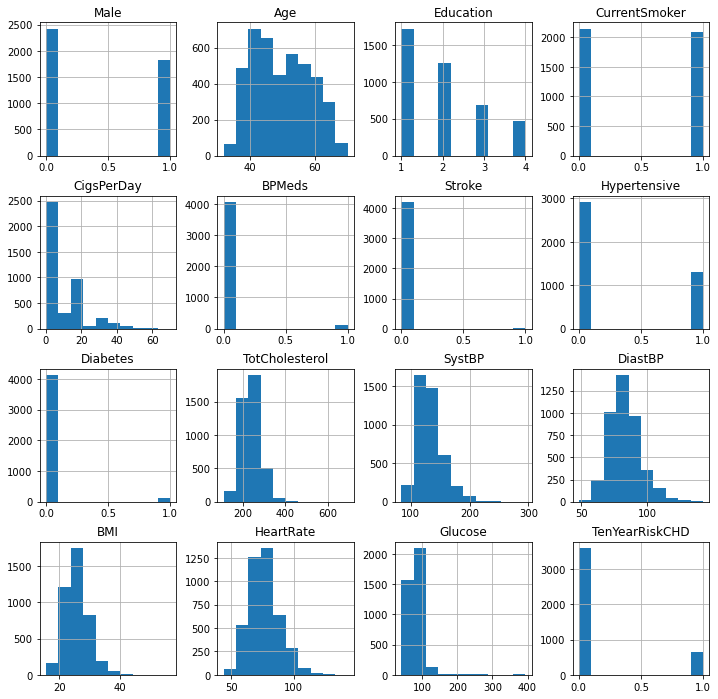

In [8]:
df.hist(figsize=(12,12))

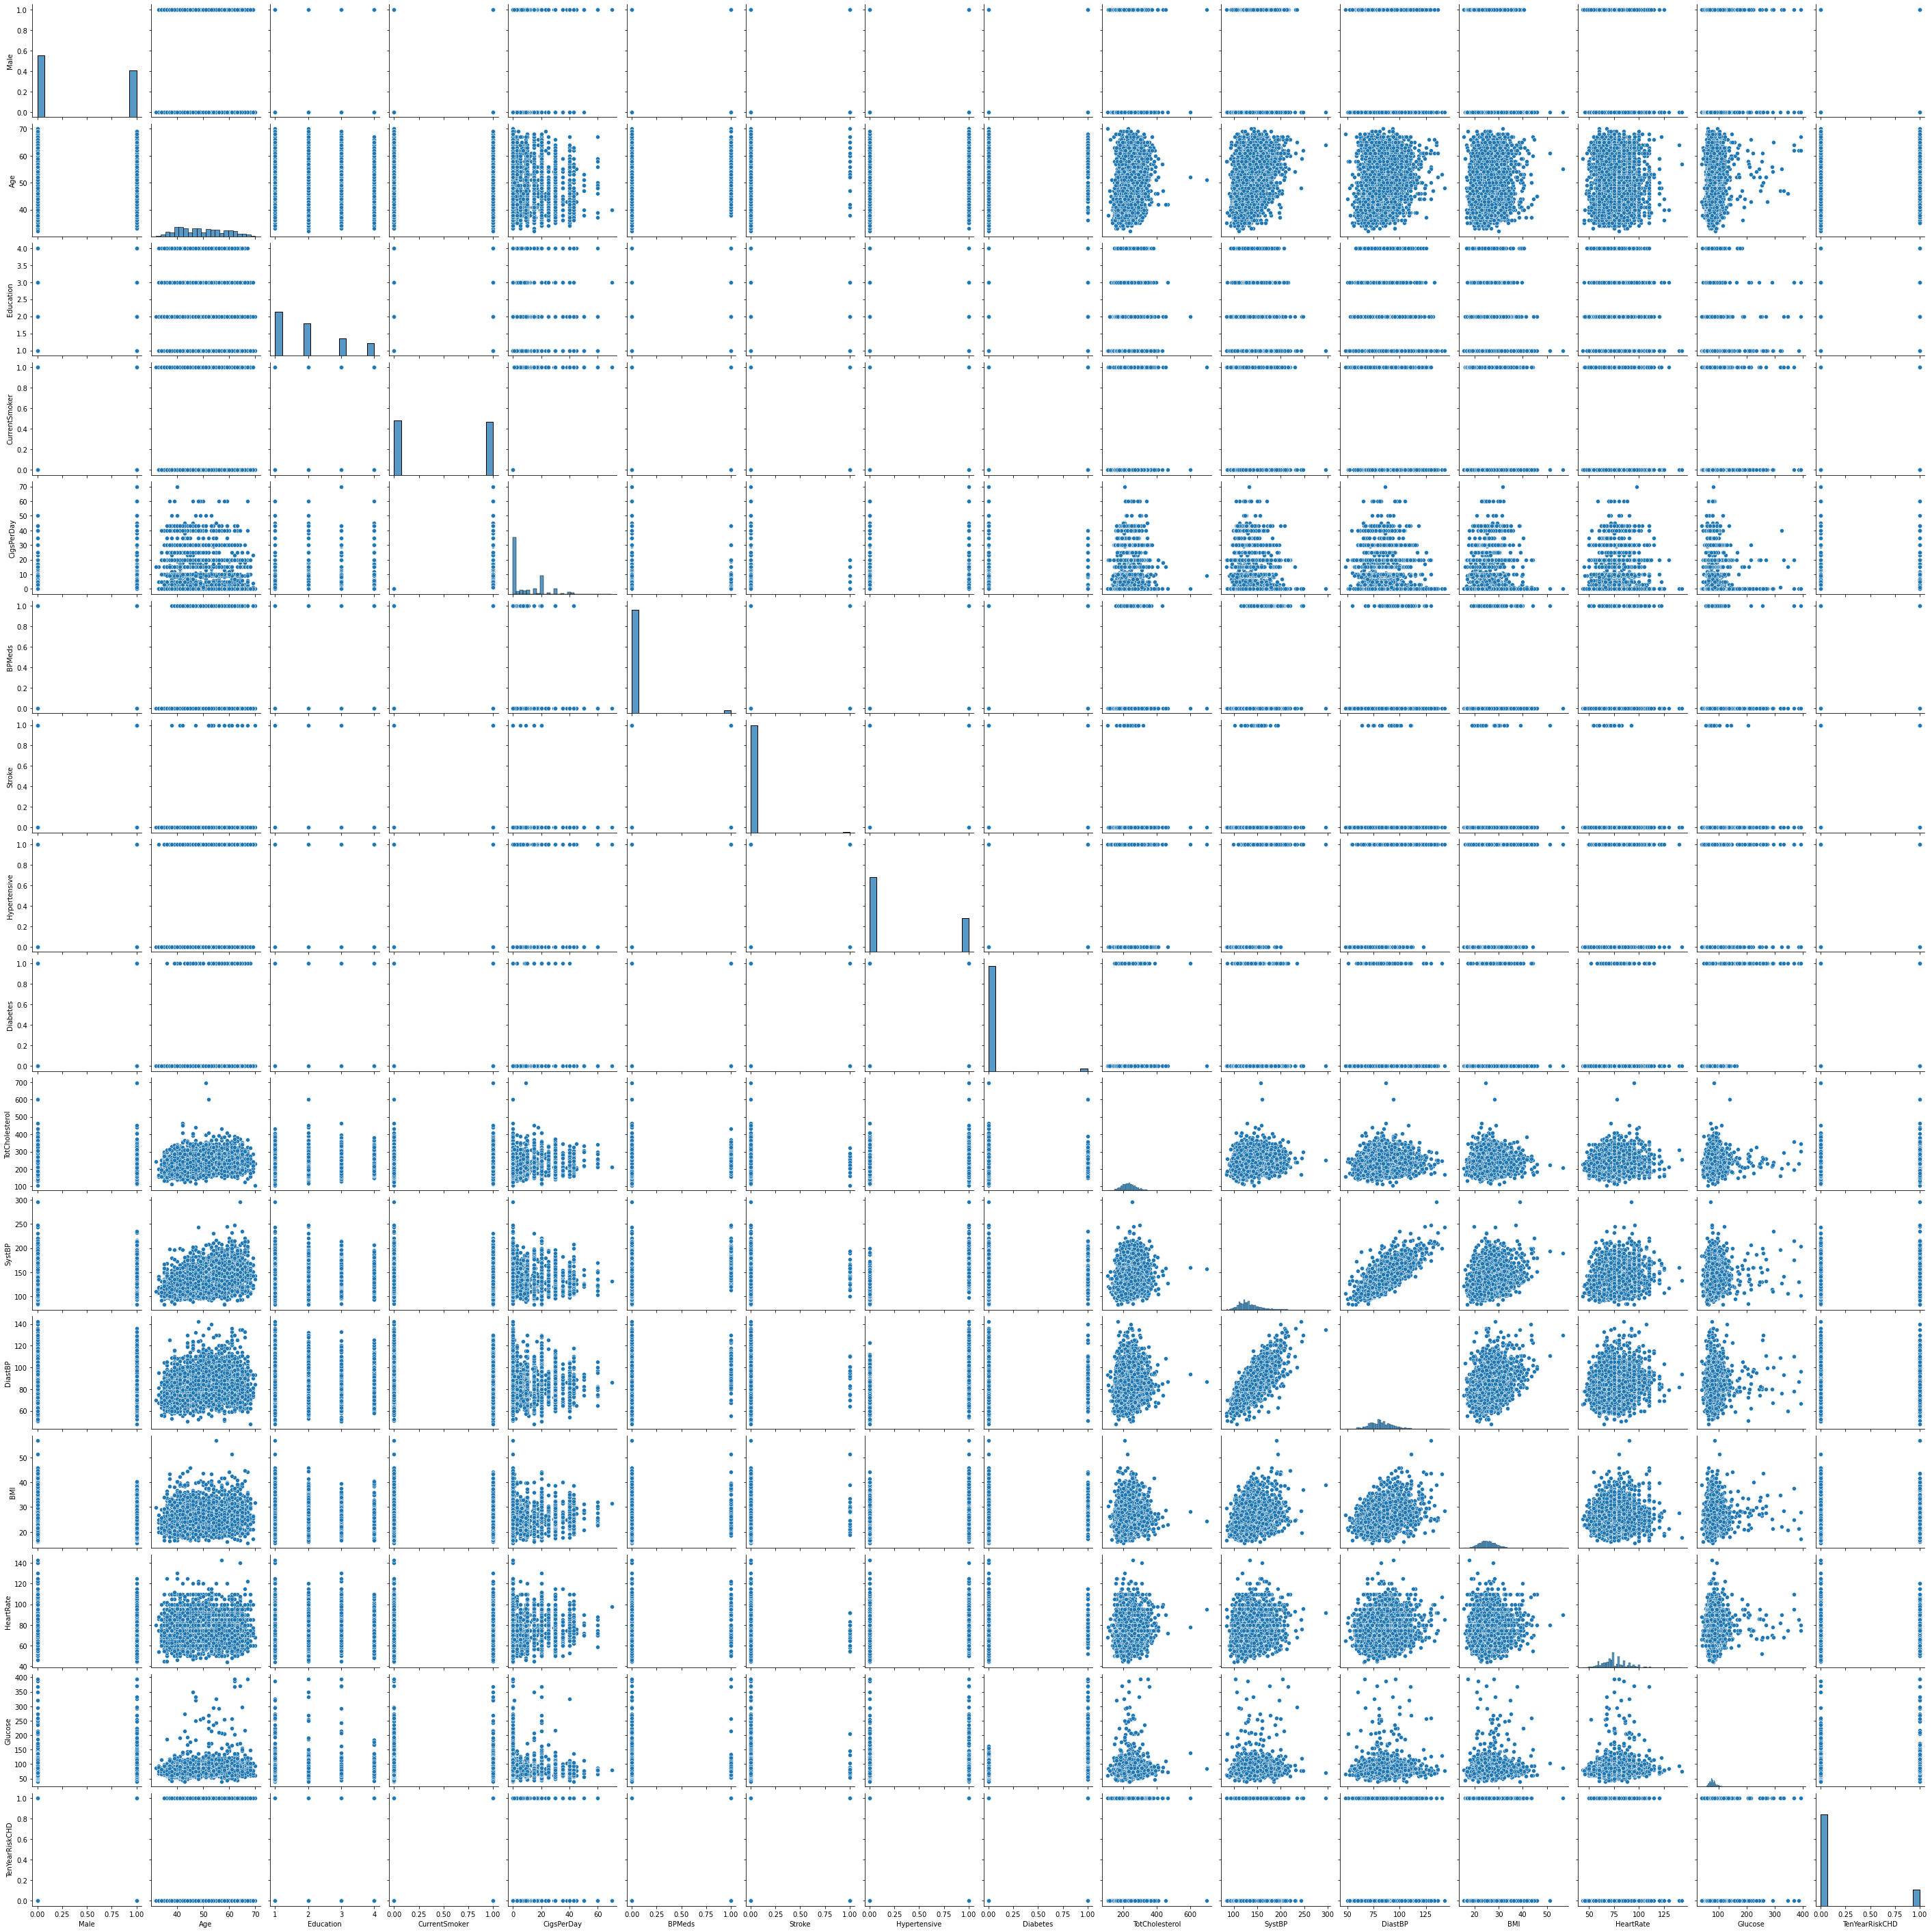

In [9]:
sns.pairplot(data=df)

Let's have a look at the dataset if and how much it is unbalanced towards patients with or low risk of heart disease.

<AxesSubplot:xlabel='TenYearRiskCHD', ylabel='count'>

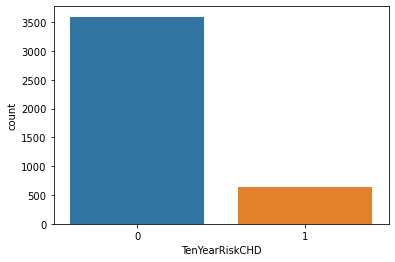

In [17]:
sns.countplot(x='TenYearRiskCHD',data=df)

The dataset under analysis is defenitely unbalanced, which means that the target label "TenYearRiskCHD" has an uneven distribution of observations. In particular, there are many more observations for the cases with no risk of TenYearRiskCHD.

Now, le't have a look at the correlation heatmap, which is a graphical representation of correlation matrix representing correlation between different variables

<AxesSubplot:>

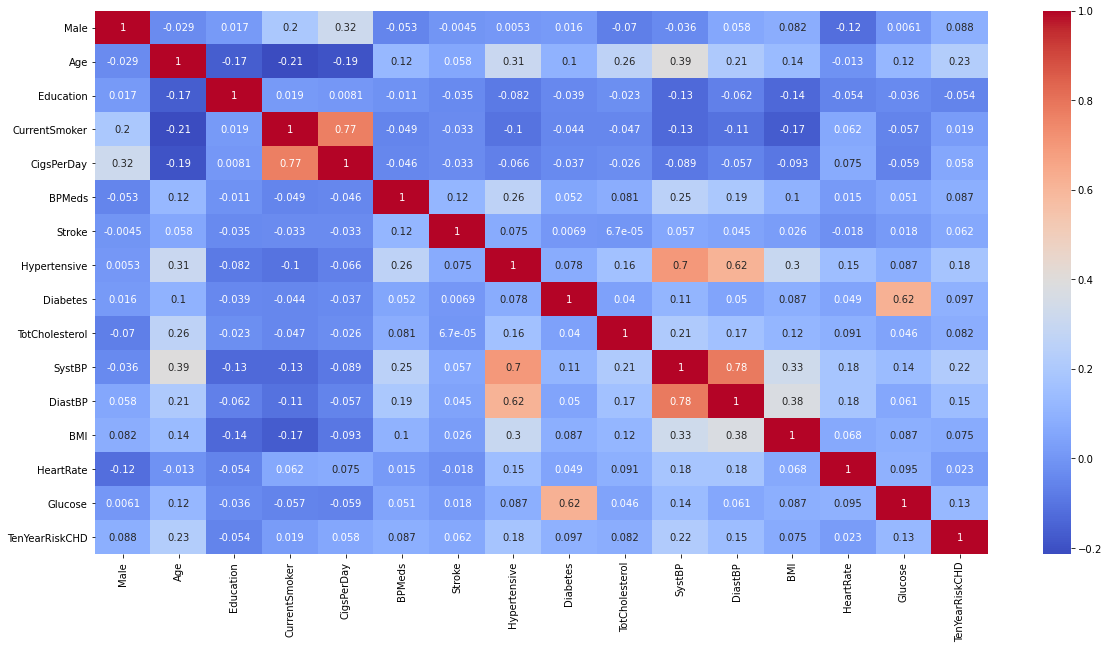

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

Let’s use the np.triu() numpy function to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0. (The np.tril() function would do the same, only for the lower triangle.) Using the np.ones_like() function will change all the isolated values into 1.

In [19]:
np.triu(np.ones_like(df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

<ipython-input-20-07dca37c0f51>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

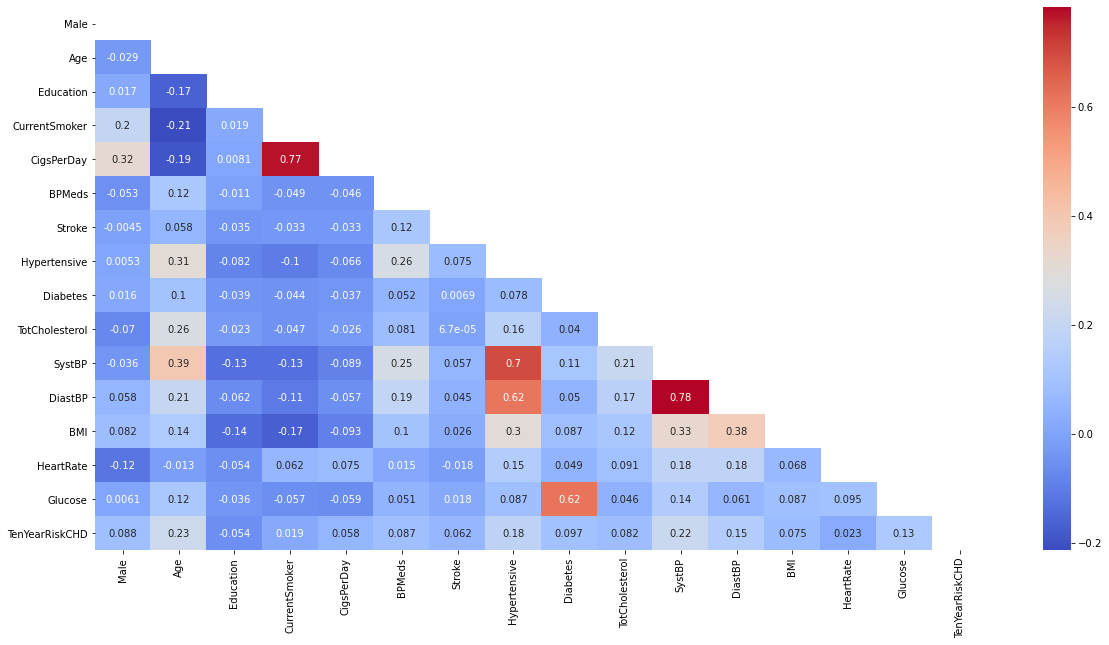

In [20]:
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, mask=mask, cmap = 'coolwarm')

In [86]:
std_corr = df.corr() # default correlation method ='pearson'
std_corr['TenYearRiskCHD'].sort_values(ascending = False)

TenYearRiskCHD    1.000000
Age               0.225256
SystBP            0.216429
Hypertensive      0.177603
DiastBP           0.145299
Glucose           0.125544
Diabetes          0.097317
Male              0.088428
BPMeds            0.087489
TotCholesterol    0.082184
BMI               0.075192
Stroke            0.061810
CigsPerDay        0.057884
HeartRate         0.022913
CurrentSmoker     0.019456
Education        -0.054059
Name: TenYearRiskCHD, dtype: float64

Let's check how many data are missing

<AxesSubplot:>

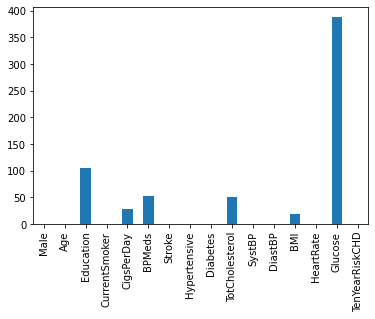

In [22]:
nulls = df.isna().sum()  # df.isnull().sum()
nulls.plot(kind="bar")

Separating X(input) and Y(output) from dataset
dropping education and currentSmoker variables as it is least correlated.


In [23]:
df_X = df.drop(columns = ['Education','TenYearRiskCHD','CurrentSmoker', 'Diabetes'], axis=1)
#df_X = df.drop(columns = ['Education','TenYearRiskCHD','CurrentSmoker', 'TotCholesterol', 'BMI', 'Stroke', 'CigsPerDay', 'HeartRate'], axis=1)

y = df['TenYearRiskCHD']

Replace "NaN" with the mean value in the "bore" colum

In [24]:
df_X["CigsPerDay"].replace(np.nan, 0, inplace=True)
df_X["BPMeds"].replace(np.nan, 0, inplace=True)
df_X["TotCholesterol"].replace(np.nan, df_X['TotCholesterol'].mean(), inplace=True)
df_X["BMI"].replace(np.nan, df_X['BMI'].mean(), inplace=True)
df_X["Glucose"].replace(np.nan, df_X['Glucose'].mean(), inplace=True)
df_X["HeartRate"].replace(np.nan, df_X['HeartRate'].mean(), inplace=True)
X=df_X
X.head()

# you could also use the following command:
#X = df_X.fillna({'CigsPerDay': 0, 'BPMeds': 0 ,'TotCholesterol': df_X['TotCholesterol'].std(),
#                 'BMI':df_X['BMI'].mean(), 'Glucose':df_X['Glucose'].mean(),
#                 'HeartRate' : df_X['HeartRate'].std()})

,Male,Age,CigsPerDay,BPMeds,Stroke,Hypertensive,TotCholesterol,SystBP,DiastBP,BMI,HeartRate,Glucose
0,1,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


Let's check how many data are missing

In [25]:
X.isnull().sum()

Male              0
Age               0
CigsPerDay        0
BPMeds            0
Stroke            0
Hypertensive      0
TotCholesterol    0
SystBP            0
DiastBP           0
BMI               0
HeartRate         0
Glucose           0
dtype: int64

Now, we randomly split our data into training and testing data using the function train_test_split.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

### Applying Logistic Regression Model to training data

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [28]:
print("prediction:", y_pred[:15])
print("actual:", list(y[:15]))

prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
actual: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [30]:
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(conf_mat)

print("Accuracy of test set:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of train set:",metrics.accuracy_score(y_train, log_reg.predict(X_train)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[728   5]
 [109   6]]
Accuracy of test set: 0.8655660377358491
Accuracy of train set: 0.8507374631268436
Precision: 0.5454545454545454
Recall: 0.05217391304347826


In [37]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y_test,y_pred):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD']); ax.yaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD'])

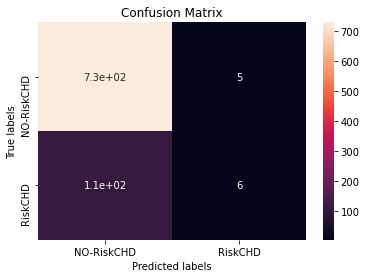

In [38]:
plot_confusion_matrix(y_test,y_pred)

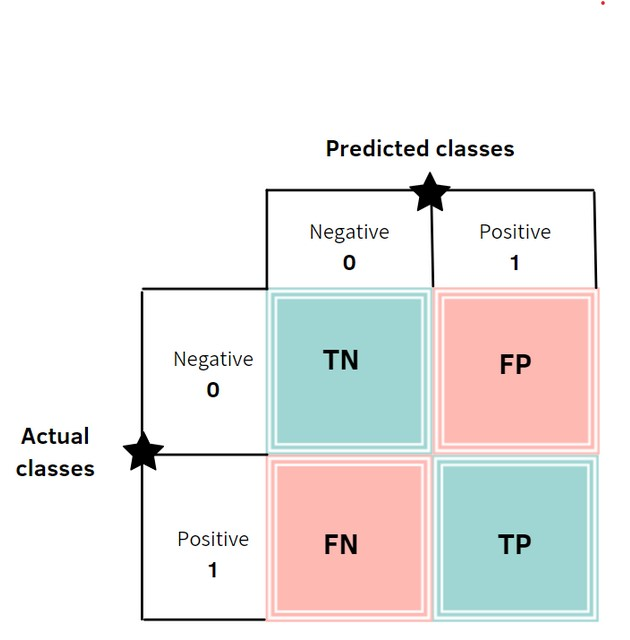

In [40]:
from IPython.display import Image
Image(filename='confusion_matrix.jpg',width=400, height=150)

Examining the confusion matrix, we see that logistic regression has some capability to distinguish between the different classes. However, it defenitely has a non-negligible amount of false negative (predicted being NO-RiskCHD whereas the ground true is actually RiskCHD).

True Positives: 6
True Negatives: 730
False Positives: 5 (Type I error)
False Negatives: 110 ( Type II error)


Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative (ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [41]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Model is:",acc * 100)

Accuracy of Logistic Model is: 86.55660377358491


In [42]:
#lasso regression
lasso_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lasso_reg.fit(X_train, y_train)

print(lasso_reg.score(X_train, y_train),lasso_reg.score(X_test, y_test))

0.8530973451327434 0.8667452830188679


In [43]:
#Decisiion tree model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

print(tree_reg.score(X_train, y_train),lasso_reg.score(X_test, y_test))

1.0 0.8667452830188679


# 1st approach

### Applying Logistic Regression Model to training data with hyperparameters tuning
Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters. The model is trained and hyperparameters are selected using the function GridSearchCV
GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [44]:
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

In [45]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['liblinear']}


lr=LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=3)
logreg_cv = grid_search.fit(X_train, y_train)

In [46]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [47]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.8480825958702066


Calculate the accuracy on the test data using the method score:

In [48]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, logreg_cv.predict(X_test)))
print("Train set Accuracy: ", logreg_cv.score(X_train, y_train))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Test set Accuracy:  0.8655660377358491
Train set Accuracy:  0.8507374631268436
Precision: 0.5454545454545454
Recall: 0.05217391304347826


Lets look at the confusion matrix:

In [49]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD']); ax.yaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD'])

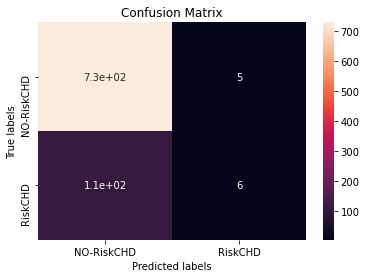

In [50]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

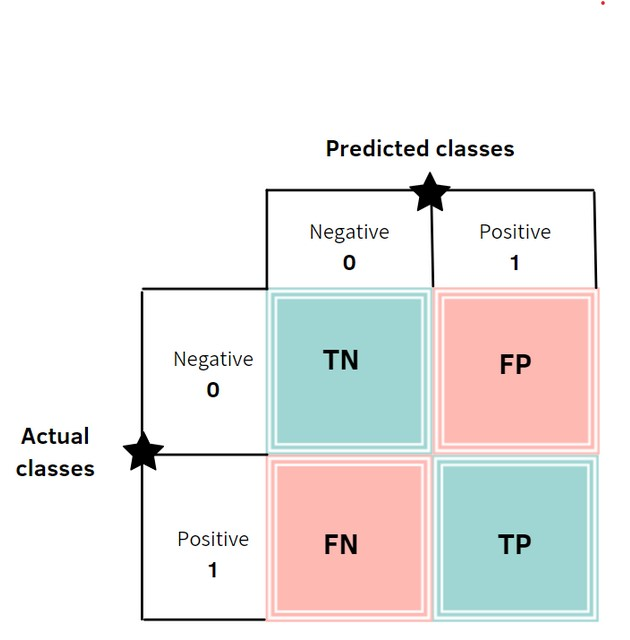

In [51]:
from IPython.display import Image
Image(filename='confusion_matrix.jpg',width=300, height=100)

Examining the confusion matrix, we see that logistic regression has some capability to distinguish between the different classes, however it defenitely has a major problem with false negatives. 
Note how the selection of the best hyperparameter has shown some improvement since the confusion matrix diagonal has slightly inreased and the terms outside the diagonal have slighly decrease -> higher Test set Accuracy

### Applying SVM Model to training data with hyperparameters tuning
Create a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters. The model is trained and hyperparameters are selected using the function GridSearchCV

In [52]:
# Support Vector Machine classification algorithm
from sklearn.svm import SVC

In [53]:
parameters = {'kernel': ['linear'], # 'sigmoid', 'rbf','poly',
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [54]:
grid_search = GridSearchCV(svm, parameters, cv=3, n_jobs = -1)
svm_cv = grid_search.fit(X_train, y_train)

In [55]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8474926253687315


Lets look at the confusion matrix:

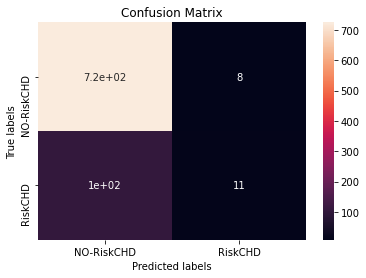

In [64]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

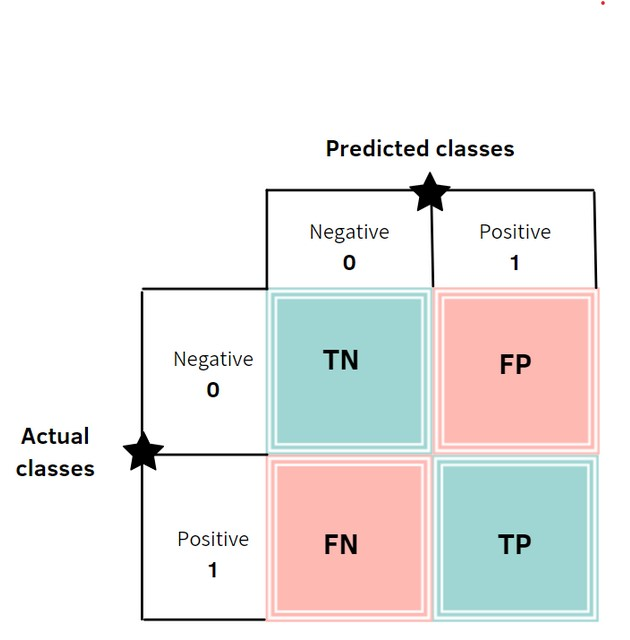

In [57]:
from IPython.display import Image
Image(filename='confusion_matrix.jpg',width=300, height=100)

In [65]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
svc = clf.fit(X_train, y_train) 

In [66]:
yhat = clf.predict(X_test)
yhat [0:2]

array([0, 0], dtype=int64)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [68]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD']); ax.yaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD'])

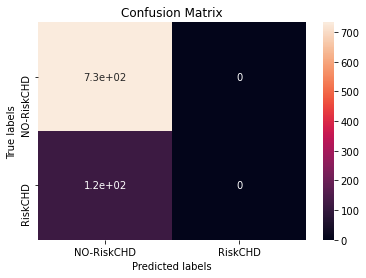

In [69]:
yhat=svc.predict(X_test)
plot_confusion_matrix(y_test,yhat)

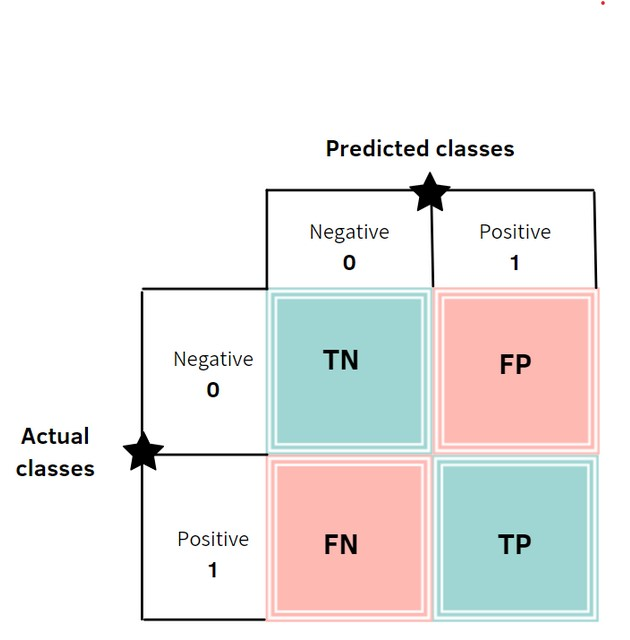

In [63]:
from IPython.display import Image
Image(filename='confusion_matrix.jpg',width=300, height=100)

# 2nd approach

Importing all necessary libraries

In [ ]:
# Evaluate Algorithms (on training data only)
# Using Feature Importances.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Currently repeated line.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import model_selection

Data standardization

In [ ]:
flagPrep = True

if flagPrep ==  True:
  #Data Reduction
  n=5
  #transform the data, z-score normalise it. Converting variables to a range 0-to-1
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_Transformed = scaler.transform(X_train)
else: 
  X_train_Transformed = X_train

Creating the ML models that are the best candidates to be used for this classification model

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear',max_iter=2500,class_weight='balanced'))) # could try lbfgs
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('QDA',QuadraticDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier(class_weight='balanced')))
#models.append(('NB', GaussianNB())) # Naive Bayes
models.append(('BR',BayesianRidge())) 
#models.append(('SVMRBF', SVC(kernel='rbf',gamma='auto',class_weight='balanced')))
models.append(('SVM', SVC(kernel='linear',gamma='auto',class_weight='balanced')))
models.append(('MLP',MLPClassifier(hidden_layer_sizes = 15, alpha=1, max_iter=1200)))
models.append(('MLPad',MLPClassifier(hidden_layer_sizes = 15, alpha=1, max_iter=1200, learning_rate='adaptive')))
models.append(('MLP30',MLPClassifier(hidden_layer_sizes = 100, alpha=2, max_iter=1200, learning_rate='adaptive')))

#models.append(('SGDC',SGDClassifier()))
#models.append(('XGB',XGBRegressor()))
#models.append(('Elas',ElasticNet()))
#models.append(('GB',GradientBoostingRegressor()))

Evaluating each and every ML model to then select the best one with the help of a box plot diagram

LR: 0.725359 (0.032510)
LDA: 0.721897 (0.035122)
BR: 0.722634 (0.035352)
SVM: 0.724334 (0.033156)
MLP: 0.724872 (0.034453)
MLPad: 0.723920 (0.030350)
MLP30: 0.726772 (0.034722)


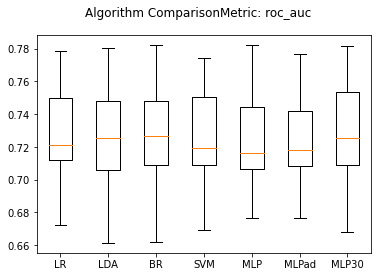

LR: 0.666372 (0.028431)
LDA: 0.846608 (0.024110)


C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y

BR: nan (nan)
SVM: 0.647198 (0.035477)
MLP: 0.849263 (0.022829)
MLPad: 0.850147 (0.022994)
MLP30: 0.848378 (0.023160)


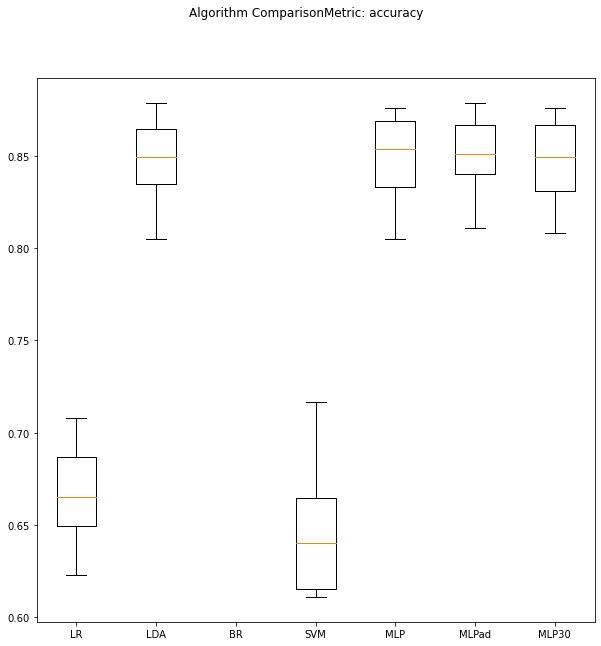

In [71]:
for i in range(2):
# evaluate each model in turn
    results = []
    names = []
    if i == 0:
      scoringmetric = 'roc_auc'
    else:
      scoringmetric = 'accuracy'
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model,X_train_Transformed , y_train, cv=kfold, scoring=scoringmetric)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10,10)
    fig.suptitle('Algorithm Comparison' + str ('Metric: ') + str(scoringmetric))
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [72]:
#Improve Results  (on training data only)
#HyperParameter Selection
#create a pipeline
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 

estimators = [] 
estimators.append(('standardize', StandardScaler())) 
estimators.append(('pca', PCA()))
estimators.append(('logistic', LogisticRegression(class_weight = 'balanced',max_iter=2000)))

#we need to determine the number of features that we should use from PCA
#we need to determine the regularisation paarmeter in logisitic regression to avoid overfitting
param_grid = {
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'pca__n_components': [10, 11, 12, 13], #2,3,4,5,6,7,8,9,
    'logistic__C': [10,5,1,0.1,0.01,0.001] # regularisation level.
    }

modelHPS = Pipeline(estimators) # evaluate pipeline

search = GridSearchCV(modelHPS, param_grid, cv=10,return_train_score=False,scoring='roc_auc')
search.fit(X_train,y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

print('Best Model Parameters')
print('intercept is',search.best_estimator_.named_steps['logistic'].intercept_)
print('coefficients are',search.best_estimator_.named_steps['logistic'].coef_)



C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

Best parameter (CV score=0.725):
{'logistic__C': 0.01, 'pca__n_components': 10}
Best Model Parameters
intercept is [-0.22944136]
coefficients are [[ 0.35079233  0.17126454  0.08214279 -0.23044485  0.3401717  -0.1071569
  -0.01743917 -0.13254242 -0.19010555  0.17159041]]


C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\damat\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\damat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

In [73]:
search.best_params_

{'logistic__C': 0.01, 'pca__n_components': 10}

In [74]:
y_predict_vince = search.best_estimator_.predict(X_test)
#print(y_predict_vince)

In [75]:
#This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict_vince):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict_vince)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix Vince'); 
    ax.xaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD']); ax.yaxis.set_ticklabels(['NO-RiskCHD', 'RiskCHD'])

In [76]:
conf_mat_vince = confusion_matrix(y_true = y_test, y_pred=y_pred)
print(conf_mat_vince)
print("Vince best estimator")
print("Accuracy of test set:",metrics.accuracy_score(y_test, y_predict_vince))
print("Accuracy of train set:",metrics.accuracy_score(y_train, search.best_estimator_.predict(X_train)))
print("Precision:",metrics.precision_score(y_test, y_predict_vince))
print("Recall:",metrics.recall_score(y_test, y_predict_vince))

[[728   5]
 [109   6]]
Vince best estimator
Accuracy of test set: 0.6768867924528302
Accuracy of train set: 0.664306784660767
Precision: 0.24921135646687698
Recall: 0.6869565217391305


## Trying Linear Mixed Effect Models (LMER), as I think this is clustered data, and LMER works for clustered data.

In [77]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Run LMER
md = smf.mixedlm("TenYearRiskCHD ~ Age", df, groups=df["Male"], re_formula="~Age")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: TenYearRiskCHD
No. Observations: 4238    Method:             REML          
No. Groups:       2       Scale:              0.1212        
Min. group size:  1819    Log-Likelihood:     -1553.5475    
Max. group size:  2419    Converged:          Yes           
Mean group size:  2119.0                                    
-------------------------------------------------------------
                   Coef.   Std.Err.  z  P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept          -0.322                                    
Age                 0.010                                    
Group Var           0.000                                    
Group x Age Cov    -0.000                                    
Age Var             0.000                                    



C:\Users\damat\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\damat\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\damat\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


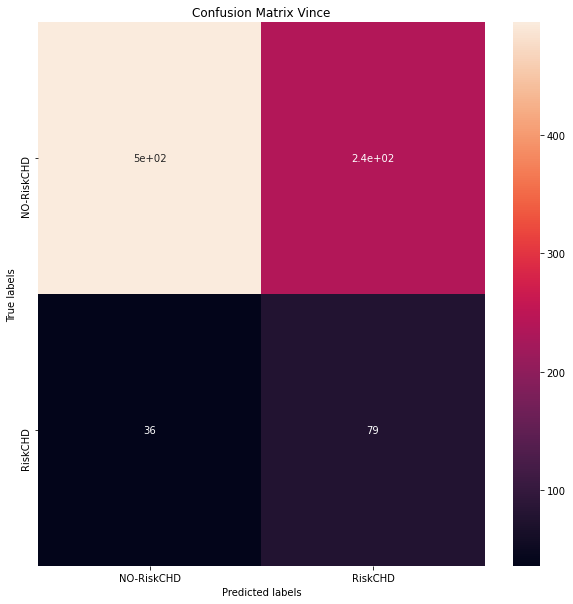

In [79]:
yhat =y_predict_vince
plot_confusion_matrix(y_test,yhat)

## Conclusions

The correlation based on covariace showed that:

Age               0.225256 - > Low-Moderate degree of correlation with TenYearRiskCHD
SystBP            0.216429 - > Low-Moderate degree of correlation with TenYearRiskCHD
Hypertensive      0.177603 - > Low degree of correlation with TenYearRiskCHD
DiastBP           0.145299 - > Low degree of correlation with TenYearRiskCHD
Glucose           0.125544 - > Low degree of correlation with TenYearRiskCHD
Diabetes          0.097317 - > Very Low or No degree of correlation with TenYearRiskCHD
Male              0.088428 - > Very Low or No degree of correlation with TenYearRiskCHD
BPMeds            0.087489 - > Very Low or No degree of correlation with TenYearRiskCHD
TotCholesterol    0.082184 - > Very Low or No degree of correlation with TenYearRiskCHD
BMI               0.075192 - > Very Low or No degree of correlation with TenYearRiskCHD
Stroke            0.061810 - > Very Low or No degree of correlation with TenYearRiskCHD
CigsPerDay        0.057884 - > Very Low or No degree of correlation with TenYearRiskCHD
HeartRate         0.022913 - > No correlation with TenYearRiskCHD
CurrentSmoker     0.019456 - > No correlation with TenYearRiskCHD
Education        -0.054059 - > Very Low or No degree of correlation with TenYearRiskCHD

This implies that the most significant features that have shown a not negligible level of correlation with the target label TenYearRiskCHD are:
Age and SystBP seem to be the most important factor associated to the TenYearRiskCHD

The best ML models achieved around 0.85 accuracy. Those are
LDA
MLP
MLPad
MLP30